---
title: python으로 네트워크 분석 하기
category: python-lib
tags: python networkx network python-lib

---

## intro 

- 저희 연구실에서는 네트워크 분석을 연구실 과제로 많이 진행했습니다. 보통 논문의 서지정보(author keywords, authors, affiliation etc)을 가지고 서로 어떤 관계를 맺고 있는지에 대한 네트워크 분석을 수행합니다. 일반적인 빈도 분석의 경우 개별적인 Node반 보는 반면 네트워크 분석에서는 서로 간의 관계(Edge)를 중심으로 보기 때문에, 더 정확한 분석을 할 수 있다. 이를 분석하여 보통 다음의 내용들을 알 수 있습니다. 
    - 네트워크 분석을 통해 봤을 때, 중요한 저자는 누구인가? 
    - 네트워크 상에서 가장 중요한 키워드는 무엇이며, 어떤 키워드들과 관련되어 있는가? 
    - 네트워크 상에서 긴밀한 관계를 맺고 있는 키워드 군(cluster)은 무엇인가? 
    
- 기존에는 보통 이를 알기 위해서 `Netminer`라는 툴을 활용했습니다. 해당 툴도 좋습니다만, 저는 GUI 형식의 프로그램보다는 마우스를 최대한 쓰지 않으면서 할 수 있는 라이브러리들을 더 좋아해서, python에 있는 `networkx`라는 라이브러리를 활용하기로 했습니다. 
    - 네트워크 분석, 특히, 논문 키워드 분석의 경우에는 "키워드들간의 균일성"을 확보하는 것이 어렵기 때문에 반복적인 데이터 전처리가 필요한데, GUI로 할 경우에는 저의 경우 조금 불편한 점들이 많았던 것 같습니다. 
    - 키워드들 간의 균일성은 예를 들어서, 'car'과 'cars'는 같은 의미를 가지고 있음에도(물론 관점에 따라 다르게 볼 수도 있습니다만), 키워드에서 전처리를 해주지 않으면 네트워크 상에서는 서로 다른 node로 인식하게 됩니다. 이를 하나하나 고치고 다시 네트워크 분석을 수행하는 반복작업이 필요한데, 이를 해결하기 위해서는 코드로 진행하는 것이 조금 편한 부분이 있습니다. 


## `networkx` 는 뭔가요? 

- 뭐 [홈페이지](https://networkx.github.io/)에는 아래와 같은 설명이 있기는 한데, 그냥 네트워크 분석해주는 패키지라고만 생각하시면 됩니다.
- `networkX is python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks`

### features

- Data structures for graphs, digraphs, and multigraphs
- Many standard graph algorithms
- Network structure and analysis measures
- Generators for classic graphs, random graphs, and synthetic networks
- **Nodes can be "anything" (e.g., text, images, XML records)**
- **Edges can hold arbitrary data (e.g., weights, time-series)**
- Open source 3-clause BSD license
- Well tested with over 90% code coverage
- Additional benefits from Python include fast prototyping, easy to teach, and multi-platform

### 근데,, 네트워크가 뭔데요. 

- 통신 쪽 연구하시는 분들한테는 이제 다른 개념으로 쓰이겠지만(꽤 비슷하긴 하죠 사실), 쉽게 말하면 그냥 `점과 선으로 연결된 구조`라고 할 수 있습니다. 좀 더 세부적으로 네트워크 혹은 그래프를 정의하자면 다음으로 분류할 수 있습니다. 
    - `edge`에 방향성이 존재하는가? 
    - 점과 점 사이에 여러 개의 선이 존재할 수 있는가? 
    - `edge`, `node`에 다른 정보(`weight`)가 포함되어 있는가? 

- `networkx`에서는 이에 따라 다음 네가지로 그래프를 분류합니다. 
    - `nx.Graph()`
    - `nx.DiGraph()`
    - `nx.MultiGraph()`
    - `nx.MultiDiGraph()`

In [1]:
# 시작적으로 보여줘야 하는 것이 많아서, 그릠 그려주는 펑션을 따로 만듬 
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# matplotlib의 경우 networkx에서 그림을 그릴 때 필요하기 때문에 일단 넣어줌 

head_url = "../../assets/images/markdown_img/"

def draw_graph(input_G, layout="shell"):
    if layout=="shell":
        pos = nx.shell_layout(input_G)
    elif layout=="spring":
        pos = nx.spring_layout(input_G)
    elif layout=="spectral":
        pos = nx.spectral_layout(input_G)
    elif layout=="circular":
        pos = nx.circular_layout(input_G)
    elif layout=="random":
        pos = nx.random_layout(input_G)
    else:
        pos = nx.shell_layout(input_G)
        
    plt.figure()
    nx.draw_networkx_nodes(input_G, pos)
    nx.draw_networkx_edges(input_G, pos)
    nx.draw_networkx_labels(input_G, pos)
    nx.draw_networkx_edge_labels(input_G, pos)
    #plt.axis("off")

- `nx.Graph()`라는 그래프 객체를 만듭니다. 해당 객체는 방향성이 없고, node 간에 하나의 edge만 존재한다고 가정한 그래프입니다.

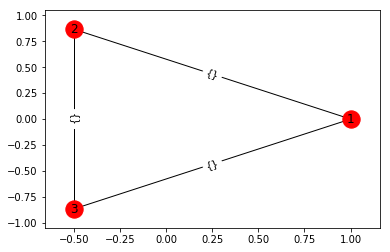

In [2]:
### four type in networkx
G = nx.Graph()
G.add_edges_from([(1,2), (2,3), (1,3)])
draw_graph(G)
plt.savefig(head_url+"networkx_graph1.png")

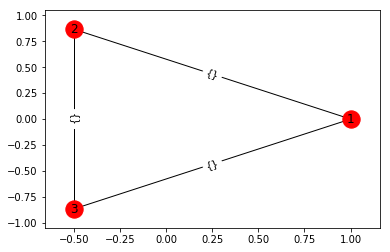

In [3]:
DG = nx.DiGraph()
DG.add_edges_from([(1,2), (2,3), (1, 3)])
draw_graph(G)
plt.savefig(head_url+"networkx_graph2.png")

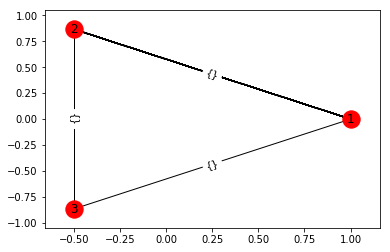

In [4]:
MG = nx.MultiGraph()
MG.add_edges_from([(1,2), (2,3), (1,3)])
MG.add_edges_from([ (1,2) for i in range(0, 100)])
draw_graph(MG)
plt.savefig(head_url+"networkx_graph3.png")

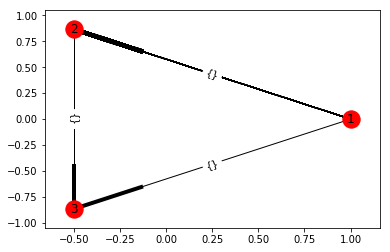

In [5]:
MDG = nx.MultiDiGraph()
MDG.add_edges_from([(1,2), (2,3), (1,3)])
MDG.add_edges_from([ (1,2) for i in range(0, 100)])
draw_graph(MDG)
plt.savefig(head_url+"networkx_graph4.png")

### node and edges 

- 이제부터는 주로 `nx.Graph`를 가지고 이야기함. 
- 어떻게 넣는가, 어떻게 빼는가. 

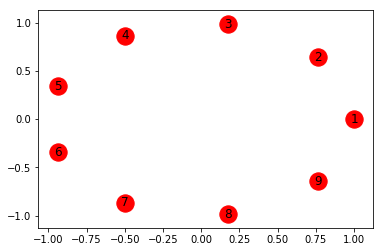

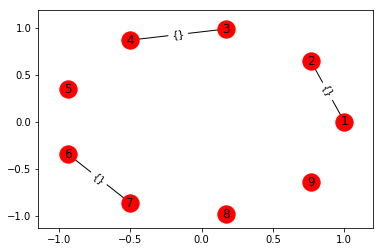

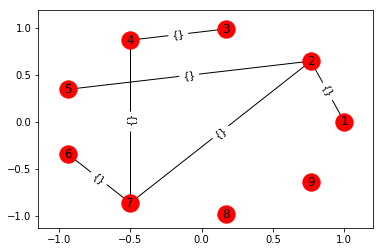

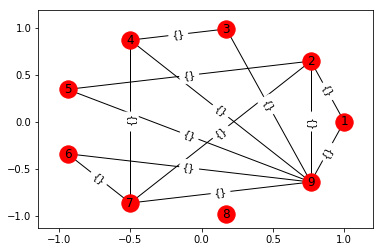

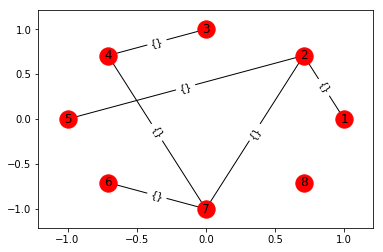

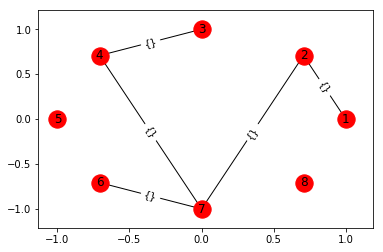

In [6]:
G = nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_nodes_from([3,4,5, 6, 7, 8, 9])
draw_graph(G)
plt.savefig(head_url+"networkx_node_and_edges1.png")

G.add_edge(3,4)
G.add_edges_from([(1,2), (6, 7)])
draw_graph(G)
plt.savefig(head_url+"networkx_node_and_edges2.png")

G.add_path([5,2,7,4])
draw_graph(G)
plt.savefig(head_url+"networkx_node_and_edges3.png")

# The first node in nodes is the middle of the star. It is connected to all other nodes.
G.add_star([9, 1,2,3,4,5,6,7])
draw_graph(G)
plt.savefig(head_url+"networkx_node_and_edges4.png")

G.remove_nodes_from([9])
draw_graph(G)
plt.savefig(head_url+"networkx_node_and_edges5.png")

G.remove_edges_from([(5,2), (8, 5)])
draw_graph(G)
plt.savefig(head_url+"networkx_node_and_edges6.png")

In [7]:
print(G.nodes())
print(G.edges())

[1, 2, 3, 4, 5, 6, 7, 8]
[(1, 2), (2, 7), (3, 4), (4, 7), (6, 7)]


### anything can be node. 
- 얘네가 홈페이지에서, `In NetworkX, nodes can be any hashable object e.g.,`라고 했길래 정말 그런지 확인해봅니다. 
    - list: `TypeError: unhashable type: 'list' `
        - Python definition of Hashable is:
            - An object is hashable if it has a hash value which never changes during its lifetime (it needs a hash() method).
        - 그렇다면, 왠지 immutable한 `tuple`의 경우는 될것 같은데. 
    - tuple: ok
    - dict: no
    - dataframe: no
    - object: ok 
        - dataframe을 node로 만들고 싶을 때는, dataframe도 object 변수로 처리해서 하면 됨. 
        - 물론 뒤에서 설명하겠지만, node attribute dictionary에 넣어도 되고. 
    - lib: ok 
    - function: ok
    - nx.Graph(): ok 
- 무엇이든 node가 될 수 있기 때문에, `networkx.Graph()`를 단순히, 네트워크 분석에만 특화된 객체라고 보는 것보다, 자료구조로 보는 것이 더 적합함. 
    - 만약 tree 구조, supply chain, keyword network의 경우는 lst, dict보다 `nx.Graph()`로 관리하는 것이 훨씬 편할 수 있음

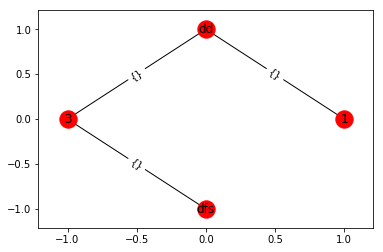

In [8]:
G = nx.Graph()
G.add_path([1, "dd", 3, "dfs"])
draw_graph(G)
plt.savefig(head_url+"networkx_anythingcanbedone1.png")

In [9]:
# list 는 안됩니다. 
G = nx.Graph()
G.add_node([1,2,3])

TypeError: unhashable type: 'list'

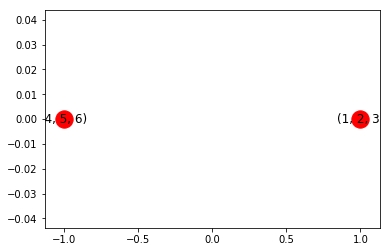

In [10]:
# 하지만 tuple은 됨
G = nx.Graph()
G.add_node( (1,2,3) )
G.add_node( (4,5,6) )
draw_graph(G)
plt.savefig(head_url+"networkx_anythingcanbedone2.png")

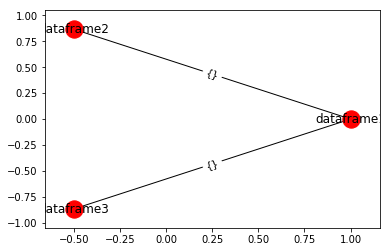

In [11]:
# 그럼 class로 싸서 넣으면? 
class df_C:
    count=1
    def __init__(self):
        self.id=df_C.count
        self.df = pd.DataFrame({})
        df_C.count+=1
    def __repr__(self):
        return "dataframe"+str(self.id)
df1 = df_C()
df2 = df_C()
df3 = df_C()

dfG = nx.Graph()
dfG.add_edge(df1, df2)
dfG.add_edge(df1, df3)
dfG.edges()
draw_graph(dfG)
plt.savefig(head_url+"networkx_anythingcanbedone3.png")

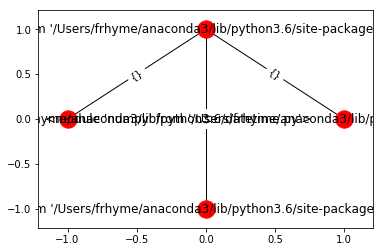

In [12]:
# lib를 가지고 네트워크화할 수도 있고, 
import networkx as nx
import numpy as np
import pandas as pd
import datetime as dt
libG = nx.Graph()

libG.add_edges_from([(np, pd), (pd, dt), (pd, nx)])
libG.edges()
draw_graph(libG)
plt.savefig(head_url+"networkx_anythingcanbedone4.png")

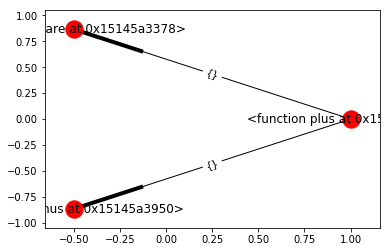

In [13]:
# function을 node로도 할 수 있고 
def plus(a, b):
    return a+b
def square(a):
    return a**2
def minus(a, b):
    return a-b
funcG = nx.DiGraph()
funcG.add_edge(plus, square)
funcG.add_edge(plus, minus)
funcG.edges()
draw_graph(funcG)
plt.savefig(head_url+"networkx_anythingcanbedone5.png")

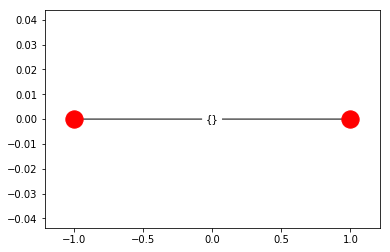

In [14]:
# graph를 node로도 하는 것도 가능함. 
GG = nx.Graph()
g1 = nx.Graph()
g2 = nx.Graph()
GG.add_edge(g1, g2)
draw_graph(GG)
plt.savefig(head_url+"networkx_anythingcanbedone6.png")

### node and edge attribute dictionary
- 지금까지는 node에 이름만 넣었지만, attribute를 함께 넣을 수도 있음.
- edge의 경우도 마찬가지. 

In [15]:
G = nx.Graph()
G.add_nodes_from([1,2,3])
G.nodes(data=True)

NodeDataView({1: {}, 2: {}, 3: {}})

[1, 2, 3]
[(1, {'weight': 2, 'name': 'aaa'}), (2, {'weight': 4}), (3, {'weight': 5})]
[(1, 2), (2, 3)]
[(1, 2, {'weight': 3, 'color': 'red'}), (2, 3, {'weight': 10, 'color': 'blue'})]


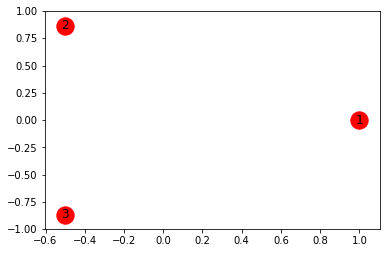

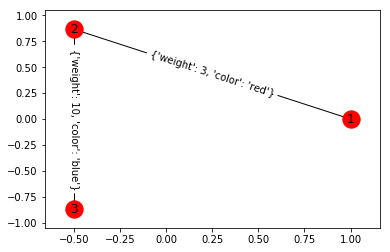

In [16]:
# node, node attribute를 함께 넣는 경우 에는 2-tuple로 넣되, 두번재에는 attribute_dictionary를 넣음
G = nx.Graph()
G.add_nodes_from( [(1, {'weight':2, 'name':'aaa'}), 
                   (2, {'weight':4}),
                   (3, {'weight':5})
                  ] )
print( G.nodes() ) 
print( G.nodes(data=True) ) 
draw_graph(G)
plt.savefig(head_url+"networkx_attribute1.png")

G.add_edges_from([(1, 2, {'weight':3, 'color':'red'}), 
                  (2, 3, {'weight':10, 'color':'blue'})
                 ])
print( G.edges() )
print( G.edges(data=True) )
draw_graph(G)
plt.savefig(head_url+"networkx_attribute2.png")

### graph generation 
- 기본적으로 제공하는 몇가지 그래프들이 있음. 

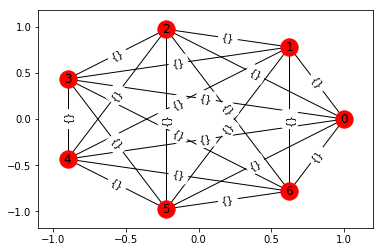

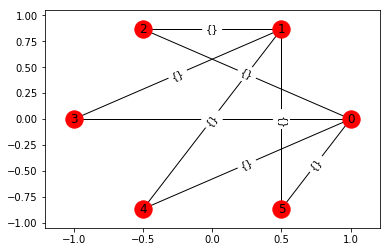

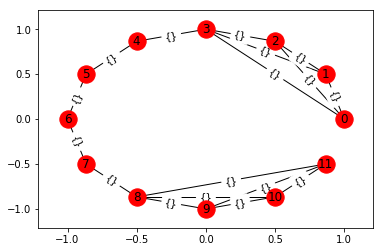

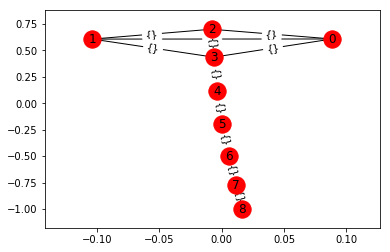

In [17]:
draw_graph( nx.complete_graph(7) )
plt.savefig(head_url+"networkx_graph_generation1.png")

draw_graph( nx.complete_bipartite_graph(2, 4) )
plt.savefig(head_url+"networkx_graph_generation2.png")

draw_graph( nx.barbell_graph(4, 4) )
plt.savefig(head_url+"networkx_graph_generation3.png")

draw_graph( nx.lollipop_graph(4, 5), 'spring')
plt.savefig(head_url+"networkx_graph_generation4.png")

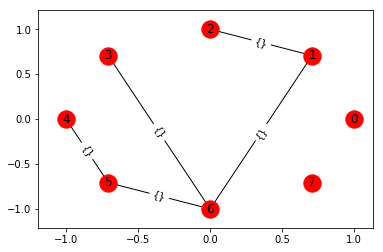

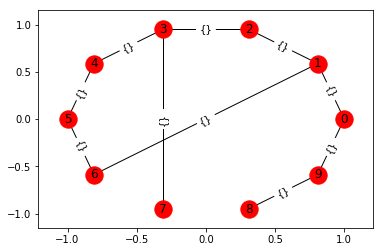

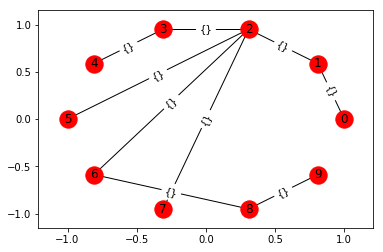

In [18]:
draw_graph( nx.erdos_renyi_graph(8, 0.3) ) 
plt.savefig(head_url+"networkx_graph_generation5.png")

draw_graph( nx.watts_strogatz_graph(10, 3, 0.1) ) 
plt.savefig(head_url+"networkx_graph_generation6.png")

draw_graph( nx.barabasi_albert_graph(10, 1) )
plt.savefig(head_url+"networkx_graph_generation7.png")

### analyzing graph 
- 이제 그래프를 어떻게 만드는지 알겠고, 필요하다면 이미 그래프를 만들어주는 걸 써서 만들면 될것 같으니, 이제 분석을 해보자. 
- degree: 각 node에 연결된 edge의 수
- centrality: 어떤 노드가 중요한가? 
    - degree_centrality: (normalized) degree, 해당 네트워크에서 직접적인 영향력을 가진 노드. 
    - closeness_centrality: 해당 노드가 다른 노드들과 얼마나 가깝게 연결되어 있는가?
    - betweenness_centrality: 해당 노드가 다른 노드들의 최단 거리에 얼마나 많이 포함되어 있는가?

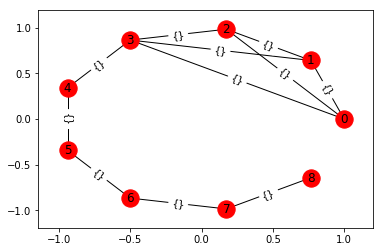

In [19]:
G = nx.lollipop_graph(4, 5)
draw_graph(G)
plt.savefig(head_url+"networkx_analyzing_graph.png")

In [20]:
print(G.edges(data=True))

[(0, 1, {}), (0, 2, {}), (0, 3, {}), (1, 2, {}), (1, 3, {}), (2, 3, {}), (3, 4, {}), (4, 5, {}), (5, 6, {}), (6, 7, {}), (7, 8, {})]


In [28]:
import pandas as pd
import collections 

node_dict={
    "degree":dict(G.degree()), 
    "degree_centrality":nx.degree_centrality(G), #normalized degree
    "closeness_centrality":nx.closeness_centrality(G), 
    "betweenness_centrality":nx.betweenness_centrality(G), 
    "pagerank":nx.pagerank(G)# 이건 네트워크 상에서 중요한 노드가 나를 참조하고 있을때, 
}
pd.DataFrame(node_dict)

,betweenness_centrality,closeness_centrality,degree,degree_centrality,pagerank
0,0.000000,0.347826,3,0.375,0.113494
1,0.000000,0.347826,3,0.375,0.113494
2,0.000000,0.347826,3,0.375,0.113494
3,0.535714,0.444444,4,0.500,0.153007
4,0.571429,0.470588,2,0.250,0.093813
5,0.535714,0.444444,2,0.250,0.105018
6,0.428571,0.380952,2,0.250,0.114071
7,0.250000,0.307692,2,0.250,0.124171
8,0.000000,0.242424,1,0.125,0.069439


### link prediction 
- 네트워크에서 아직 연결되지 않은 노드 쌍 중에서 어떤 노드가 향후에 연결될 가능성이 있는가?

[(0, 4, 0.5), (3, 5, 0.5), (0, 2, 0.3333333333333333), (0, 7, 0.3333333333333333), (2, 7, 0.3333333333333333)]


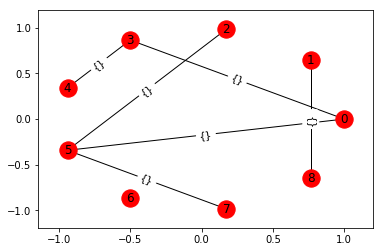

In [29]:
import numpy as np
G = nx.complete_graph(9)

for i in range(0, int(len(G.nodes())**1.9)):
    f = np.random.randint(len(G.nodes()))
    t = np.random.randint(len(G.nodes()))
    try:
        G.remove_edge(f, t)
    except:
        continue

predicted_node_pair = list(filter(lambda x: True if x[2]>0.1 else False, nx.resource_allocation_index(G)))
predicted_node_pair = sorted(predicted_node_pair, key=lambda x: x[2], reverse=True)
print( predicted_node_pair )
draw_graph(G)
plt.savefig(head_url+"networkx_link_prediction.png")

### 마무리
- 추가하려면 내용이 더 있기는 한데, 대충 사용법 정도만 공유하면 되지 않을까 싶어서, 이정도로만 정리합니당

### reference
- https://networkx.github.io/